# Homework exercise 1
## Deadline: upload to Moodle by 15 March 18:00 h

__Suggestion: take this notebook and simply add your code and explanations.__

If you prefer to use .py files, you are expected to also include a PDF containing the output of your code and your explanations. Still, the code needs to be in a form that can be easily run on another computer.

__Name:__

The name of the file that you upload should be *Homework1_YourLastName_YourStudentID*.

Reminder: you are required to attend class on 16 March to earn points for this homework exercise unless you have a valid reason for your absence.

You are expected to work on this exercise on your own. If any part of the questions is unclear, please ask on the Moodle forum.

Please note that you are expected to solve these exercises using Python packages you have encountered in class. In particular, you are expected to write your own functions rather than looking for certainly existing similar code on the web, and you may not use any packages that make available functionality that is similar to what the questions ask you to implement.

If you are not able to answer one of the earlier questions and later questions rely on the answers on the earlier ones, you are allowed to use dummy functions (which yield incorrect answers, e.g. returning random numbers instead of actually doing the required calculations) as input to your answers to later questions.

#### Building a simple portfolio

Suppose you are a portfolio manager who relies on discounted cash flow analysis of various asset you might invest in.

1. Write a function that takes a list of future cash flows and a discount rate as inputs and returns the fair value of the stream of cash flows. Test the function by computing the values of a few arbitrary example inputs.

In [12]:
def my_discount_function(x, r):
    int = 0
    y = 0
    if type(x) is list:
        for int in range (0, len(x)):
            y += x[int]/((1+r)**(int + 1))
        return y
    else:
        print("This object isn't a list")

In [13]:
my_list1 = [100,90,110]
r1 = 0.02
my_discount_function(my_list1, r1)

288.19986279786804

In [14]:
# rent a flat for the next 5 years for 700€
my_list2 = [700, 700, 700, 700, 700]
r2 = 0.03
my_discount_function(my_list2, r2)

3205.7950310361734

In [15]:
# isn't a list
my_list3 = (5, 9, 10)
r3 = 0.03
my_discount_function(my_list3, r3)

This object isn't a list


2. An alternative valuation method that relies on different inputs is the Gordon Growth Model (GGM), which requires only the initial dividend payment, the cost of equity, and the expected growth rate. Please write a function that returns the value of an asset using this model and test it with some examples. The function should return `None` and print an informative error message if the value of the asset is infinite.

In [16]:
import math
# I hope we are allowed to use math

def my_GGM(g, r, D_1):
    """"
    P_0 = \frac{D_1}{r - g} 
    g = expected growth rate
    r = cost of equity
    D_1 = value of dividend next year = initial dividend payment   
    """
    z = D_1/(r-g)
    if abs(z) >= math.inf:
        print("Error because of infinity!")
        return None
    else:
        return z


In [17]:
g = 0.08
r = 0.1
D1 = 10
my_GGM(g, r, D1)

499.9999999999999

In [18]:
r = 0.2
g = 0.02
D1 = math.inf
my_GGM(g, r, D1)

Error because of infinity!


3. Based on the functions for a fixed stream of cash flows and for the GGM, it is possible to compute the value of an asset with a list of expected cash flows for a number of years and an expected fixed growth rate afterwards. Please write a functions that implements such a calculation by making use of the previously written functions. Again show some examples demonstrating that the function works.

In [19]:
def my_combination_function(x, dr, g, r, D_1):
    
    x1 = my_discount_function(x, dr)
    x2 = my_GGM(g, r, D_1)/((1 + dr)**(1 + len(x)))
    xx = x1 + x2
    return xx

In [20]:
g = 0.08
r = 0.1 
x = [700, 700, 700, 700, 700]
D1 = 5
dr = 0.03 

my_combination_function(x, dr, g, r, D1)

3415.166095207087

4. Being able to value assets also allows you to decide whether an asset is over- or undervalued. Write a new function that takes the market price as an additional input and that calls, dependent on the input, one of the previously written functions. It should return the over- or undervaluation in percentage terms based on a comparison of the fair value and the current price.

In [21]:
def my_over_undervalued(price = None, x = None , dr = None, g = None, r = None, D_1 = None):
    """"
    negative: overvalued, positive: undervalued
    """
    
    if x != None and dr != None and g != None and r != None: 
         fair_value = my_combination_function(x, dr, g, r, D_1)
    elif x == None and dr == None and g != None and r != None and D_1 != None:
        fair_value = my_GGM(g, r, D_1)
    elif x != None and dr != None and g == None and r == None and D_1 == None: 
        fair_value = my_discount_function(x, dr)
    else: 
        print("Check Input!")
        return None
        
    z = fair_value/price

    if fair_value > price and price != None:
        print("The asset is undervalued!")
    elif fair_value < price and price != None:
        print("The asset is overvalued!")
    else: 
        print("The asset is fair valued!")
    return z-1

In [22]:
# next three examples: if price, x and dr aren't None
my_over_undervalued(price = 300, x = [102, 104.04, 106.1208], dr = 0.02)

The asset is fair valued!


0.0

In [23]:
my_over_undervalued(price = 300, x = [102, 104.04, 108], dr = 0.02)

The asset is undervalued!


0.0059027071036026335

In [24]:
my_over_undervalued(price = 300, x = [102, 104, 106.1208], dr = 0.02)

The asset is overvalued!


-0.00012815583749836712

In [25]:
# result should be 499.99999999 (see above)
my_over_undervalued(price = 501, g = 0.08, r = 0.1, D_1 = 10)

The asset is overvalued!


-0.001996007984032211

In [26]:
# result should be 499.99999999 (see above)
my_over_undervalued(price = 499, g = 0.08, r = 0.1, D_1 = 10)

The asset is undervalued!


0.002004008016031733

In [27]:
# result should be: 3415.166095207087 (see above)
my_over_undervalued(price = 3450, x = [700, 700, 700, 700, 700], dr = 0.03 , g = 0.08, r = 0.1, D_1 = 5)

The asset is overvalued!


-0.01009678399794578

In [28]:
# result should be: 3415.166095207087 (see above)
my_over_undervalued(price = 3400, x = [700, 700, 700, 700, 700], dr = 0.03 , g = 0.08, r = 0.1, D_1 = 5)

The asset is undervalued!


0.00446061623737859

5. You are next asked to build a simple portfolio based on the measured over- and undervaluation of stocks. The idea is invest €1 million in a portfolio of undervalued stocks, and to take short positions totalling the same amount in overvalued stocks.

The code below produces some random data of stocks' future profits, long-term earnings growth, cost of capital, and price. You can change some of the parameters in case you find that all stocks turn out to over- or undervalued to assure that you have stocks suitable for long and short positions.

In [29]:
import numpy as np

np.random.seed(1234)

assets = dict()

# cost of capital between 5 and 25 percent
assets['cost_of_capital']=list(5+20*np.random.rand(1000))

# profits for some number of years
assets['profit']=list(10*np.random.rand(np.random.randint(2,20), 1000))

# eternal growth after the profit series above ends
assets['longtermgrowth']=list(0.05*np.random.rand(1000))

# current price
assets['price']=list(0.1*np.random.rand(1000)+0.5)

The idea is to build a portfolio where the position sizes are proportional to the mispricing. For example, if you had (only) three stocks the are undervalued, and stock A is undervalued by 10 percent whereas stocks B and C are each undervalued by 20 percent, you would invest €200000 in stock A and €400000 each in stock B and C on the long side of your portfolio. Please insert a list containing the sign and size of your positions with a new key to the `assets` dictionary.

In [30]:
z = [0] * len(assets['longtermgrowth'])

for int in range(len(assets['profit'][0])):
    z[int] = my_over_undervalued(price = assets['price'][int], D_1 = assets['profit'][0][int],  r = assets['cost_of_capital'][int], g = assets['longtermgrowth'][int])
    


The asset is undervalued!
The asset is overvalued!
The asset is undervalued!
The asset is overvalued!
The asset is overvalued!
The asset is undervalued!
The asset is overvalued!
The asset is overvalued!
The asset is overvalued!
The asset is overvalued!
The asset is undervalued!
The asset is overvalued!
The asset is overvalued!
The asset is overvalued!
The asset is undervalued!
The asset is overvalued!
The asset is overvalued!
The asset is undervalued!
The asset is overvalued!
The asset is overvalued!
The asset is overvalued!
The asset is overvalued!
The asset is undervalued!
The asset is overvalued!
The asset is overvalued!
The asset is overvalued!
The asset is overvalued!
The asset is overvalued!
The asset is overvalued!
The asset is undervalued!
The asset is overvalued!
The asset is undervalued!
The asset is overvalued!
The asset is overvalued!
The asset is overvalued!
The asset is overvalued!
The asset is overvalued!
The asset is overvalued!
The asset is undervalued!
The asset is ov

In [31]:
z

[0.7648832282540523,
 -0.3517701385043853,
 0.10110899984531452,
 -0.8420093892261328,
 -0.9782808593893996,
 0.609753806091585,
 -0.2156355162233371,
 -0.6791389537299779,
 -0.3698396964420675,
 -0.9044646672328476,
 0.41897950622799396,
 -0.03503333743666581,
 -0.6085916686887562,
 -0.9091648713537557,
 0.2246816505187319,
 -0.0969413318340071,
 -0.8141210542384527,
 1.3441407185095802,
 -0.5253276701934511,
 -0.3378685453225473,
 -0.3738882266160163,
 -0.6657616182800701,
 0.8492833612675004,
 -0.7528518428974154,
 -0.8426238988660308,
 -0.07519362000394514,
 -0.7224399539389623,
 -0.600453053842263,
 -0.6265293790845097,
 0.0066752193524270975,
 -0.9669958737633122,
 0.15258354669361784,
 -0.24095613979478125,
 -0.16345495699535173,
 -0.29895431381253657,
 -0.9969420613696626,
 -0.9665463298834988,
 -0.5187177852075738,
 0.15601906666851661,
 -0.2642637120395789,
 1.8725895334300482,
 -0.9713304316048839,
 0.65292131880304,
 -0.9033036550815833,
 -0.4738195053114166,
 0.01752745762

In [32]:
negative = 0
positive = 0
result = [0] * len(assets['longtermgrowth'])

for int in range(len(assets['profit'][0])):
    if z[int] < 0:
        negative += z[int]
    else: 
        positive += z[int]
        
for int in range(len(assets['profit'][0])):
    if z[int] < 0:
        result[int] = 1000000*z[int]/abs(negative)
    else: 
        result[int] = 1000000*z[int]/positive
        
# negative sign means: sell, positive sign means: buy        
result

[5413.772227031104,
 -864.8133465470607,
 715.6400807936736,
 -2070.0476760667984,
 -2405.0658406325592,
 4315.780630045007,
 -530.1316172327186,
 -1669.6369789738983,
 -909.2366592738122,
 -2223.5915732610188,
 2965.4979096481475,
 -86.12811172127871,
 -1496.1991939313577,
 -2235.1468441903226,
 1590.2757892578684,
 -238.32653322576346,
 -2001.4852778687475,
 9513.702774865682,
 -1291.4978583041536,
 -830.6368147554878,
 -919.1898148862115,
 -1636.7493146385893,
 6011.1485051185755,
 -1850.857279922637,
 -2071.558424365176,
 -184.86062071976906,
 -1776.0908214142507,
 -1476.1907225711154,
 -1540.298364550839,
 47.246580660423724,
 -2377.3221378085336,
 1079.9721276114092,
 -592.3813957402994,
 -401.8477207015507,
 -734.9676743231486,
 -2450.9436874667376,
 -2376.216951482104,
 -1275.2477104683205,
 1104.2884179136195,
 -649.6821650398501,
 13254.014252415422,
 -2387.9784814331206,
 4621.316263190914,
 -2220.737269572293,
 -1164.8670173933217,
 124.05771204407365,
 -2244.9422917415545,

In [33]:
# Please insert a list containing the sign and size of your positions with a new key to the assets dictionary.

assets['size_of_positions'] = result
assets

{'cost_of_capital': [8.830389007577846,
  17.442175420796637,
  13.75455478014229,
  20.707171674275386,
  20.59951616237607,
  10.451852105652833,
  10.529285102861934,
  21.037443550700385,
  24.162787073674103,
  22.518652694841894,
  12.156345399157333,
  15.019902510469175,
  18.669258703442726,
  19.254040539658003,
  12.405015095807899,
  16.2239237213125,
  15.061663306156195,
  5.275368991813645,
  20.45653243224748,
  22.652823812722332,
  12.297719678027445,
  17.307923568669874,
  6.5076248328595305,
  12.37648012003949,
  23.662802039650433,
  18.027562864531546,
  12.944051554523083,
  20.77460285881491,
  11.336722443377425,
  16.361973052521385,
  22.382547791224518,
  13.723468477913588,
  21.04295284160318,
  7.875336490291291,
  19.08521942236671,
  19.091626163791453,
  9.375842113481772,
  23.4973525723113,
  13.842815108083533,
  23.186319179449452,
  6.196184455597038,
  8.685741676276272,
  5.947105576030303,
  18.497618871646605,
  16.892495598688978,
  15.6662

6. Finally, make a scatter plot where each data point consists of the price on the X-axis and the mispricing on the Y-axis.

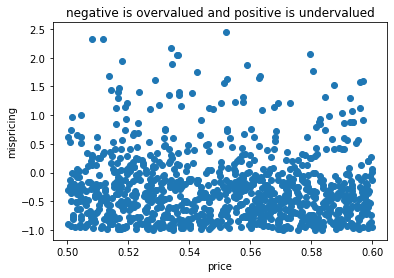

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt

# make scatter plot
plt.scatter(assets['price'], z)
plt.xlabel('price')
plt.ylabel('mispricing')
plt.title('negative is overvalued and positive is undervalued')
plt.show()